In [317]:
#libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
# 1(a)------------------------------------
# helper function with all the math for the numerator and denominator of the p_j|i matrix
def expDist(pt1, pt2, var):
    d = math.dist(pt1, pt2)
    e = -(d * d)
    f = e / (2 * var)
    result = math.exp(f)
    return(result)
# construct the p_j|i matrix
def jgiMat(df, var = 1):
    n = len(df) # number of points total
    result = np.empty((n, n))
    for i in range(n):
        xi = df.iat[i, 0]
        yi = df.iat[i, 1]
        pti = [xi, yi]
        r = []
        denominator = 0
        for j in range(n):
            # calculate the numerator of the equation
            xj = df.iat[j, 0]
            yj = df.iat[j, 1]
            ptj = [xj, yj]
            numerator = expDist(pti, ptj, var)
            r.append(numerator)
            # calculate the denominator of the equation
            k = j
            if k != i: # ensure the sum only applies when k!=i
                ptk = ptj
                d = expDist(pti, ptk, var)
                denominator += d
        row = [x / denominator for x in r]
        result[i] = row
    return(result)

In [358]:
df = (pd.read_table("problem1.tsv", sep="\t", header=None)
        .rename(columns = {'0':'x'})
        .rename(columns = {'1':'y'})
     )
df.columns = ["x", "y"]

pjgi = jgiMat(df)
for r in range(5):
    print(np.sum(pjgi[r,]))
print("...")

1.0207383872641373
1.020965204486741
1.0350869680614612
1.02094584469973
1.023984587833681
...


In [359]:
# 1(b)------------------------------------
#construct the p_ij matrix
def pijMat(df, var = 1):
    pjgi = jgiMat(df, var)
    pigj = pjgi.transpose()
    pij = (pjgi + pigj) / (2 * len(df))
    return(pij)

In [329]:
pij = pijMat(df)
print(np.sum(pij))

1.0403048156926824


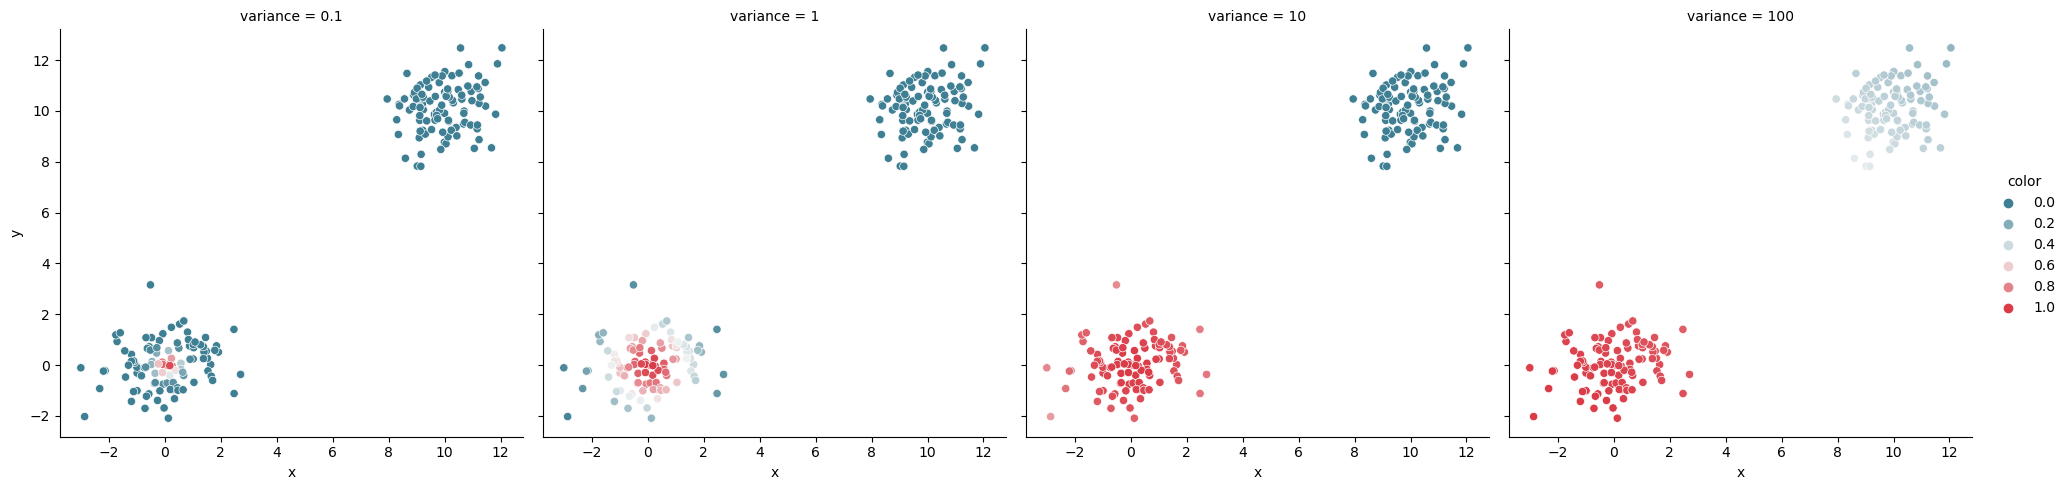

In [331]:
# 1(c)------------------------------------
ef = df.copy(deep = False)
for v in [0.1, 1, 10, 100]:
    pij = ijMat(df, var = v)
    wj = pij[0,] / max(pij[0,])
    ef[str(v)] = wj
ef = ef.melt(id_vars = ["x", "y"], var_name = "variance", value_name = "color")

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.relplot(
    data = ef, x = "x", y = "y",
    hue = "color", palette= cmap,
    col = "variance"
)

In [303]:
# 1(d)------------------------------------
# helper function with all the math for the numerator and denominator of the qij matrix
def invDist(pt1, pt2):
    d = math.dist(pt1, pt2)
    e = 1 + (d * d)
    result = 1 / e
    return(result)
def qijMat(df):
    n = len(df) # number of points total
    mat = np.empty((n, n))
    denominator = 0
    for i in range(n):
        # relevant to numerator
        xi = df.iat[i, 0]
        yi = df.iat[i, 1]
        pti = [xi, yi]
        r = []
        # relevant to denominator
        k = i
        ptk = pti
        for j in range(n):
            # calculate the numerator of the equation
            xj = df.iat[j, 0]
            yj = df.iat[j, 1]
            ptj = [xj, yj]
            numerator = invDist(pti, ptj)
            r.append(numerator)
            # calculate the denominator of the equation
            l = j
            if l != k: # ensure the sum only applies when l!=k
                ptl = ptj
                d = invDist(ptk, ptl)
                denominator += d
        mat[i] = r
    result = mat / denominator # rather than normalizing by row, qij is normalized all at once
    return(result)

1.057035044181314


In [332]:
np.random.seed(123)
randDf = pd.DataFrame({
    'x':np.random.rand(200) * 10, # generate 200 random floats between 0 and 10
    'y':np.random.rand(200) * 10
})
qij = qijMat(randDf)
print(np.sum(qij))

1.057035044181314


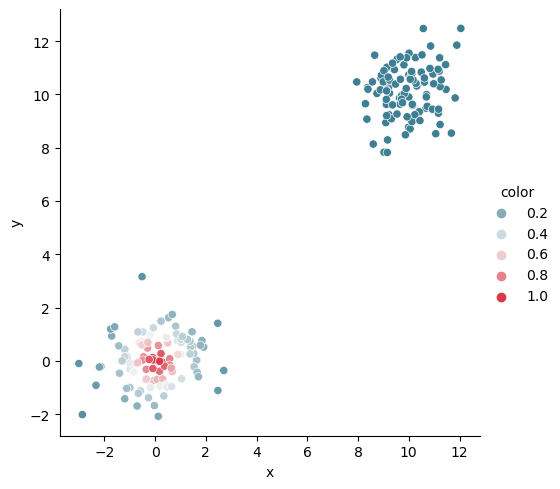

In [336]:
# 1(e)------------------------------------
ff = df.copy(deep = False)
qij = qijMat(ff)
ff["color"] = qij[0,] / max(qij[0,])

cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.relplot(
    data = ff, x = "x", y = "y",
    hue = "color", palette= cmap
)

In [375]:
# 1(f)------------------------------------
# helper function containing all the math for KLD
def logExpression(p, q):
    if p == 0: # avoids NaN when taking log(0)
        result = 0
    else:
        result = p * math.log(p / q)
    return(result)
# calculate KLD of P given Q
def KLD(P, Q, var = 1):
    pij = pijMat(P, var)
    qij = qijMat(Q)
    n = len(pij)
    outerSum = 0
    for i in range(n):
        innerSum = 0
        for j in range(n):
            if j != i: # ensures sum only applies when j!=i
                p = pij[i, j]
                q = qij[i, j]    
                innerSum += logExpression(p, q)
        outerSum += innerSum
    result = outerSum
    return(result)

In [378]:
# 1(g)------------------------------------
for v in [0.1, 1, 100]:
    result = KLD(df, df, v)
    print("When variance =", v, ", KL(P||Q) =", result)

When variance = 0.1 , KL(P||Q) = 1.2980311536488227
When variance = 1 , KL(P||Q) = 0.10541352321790873
When variance = 100 , KL(P||Q) = 0.7473665628685073


In [379]:
# 1(i)------------------------------------


In [ ]:
# 1(j)------------------------------------
